<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-&amp;-Reading-dataset" data-toc-modified-id="Imports-&amp;-Reading-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports &amp; Reading dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Company" data-toc-modified-id="Company-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Company</a></span></li><li><span><a href="#Inches" data-toc-modified-id="Inches-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Inches</a></span></li><li><span><a href="#Weight" data-toc-modified-id="Weight-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Weight</a></span></li><li><span><a href="#GPU" data-toc-modified-id="GPU-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>GPU</a></span></li><li><span><a href="#Ram" data-toc-modified-id="Ram-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Ram</a></span></li><li><span><a href="#CPU" data-toc-modified-id="CPU-2.0.6"><span class="toc-item-num">2.0.6&nbsp;&nbsp;</span>CPU</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Extraction,-Preparation,-and-Rare-Labeling" data-toc-modified-id="Feature-Extraction,-Preparation,-and-Rare-Labeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Extraction, Preparation, and Rare Labeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Inches" data-toc-modified-id="Inches-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Inches</a></span></li><li><span><a href="#ScreenResolution" data-toc-modified-id="ScreenResolution-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>ScreenResolution</a></span></li><li><span><a href="#Weight" data-toc-modified-id="Weight-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Weight</a></span></li><li><span><a href="#Ram" data-toc-modified-id="Ram-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Ram</a></span></li><li><span><a href="#CPU" data-toc-modified-id="CPU-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>CPU</a></span></li><li><span><a href="#GPU" data-toc-modified-id="GPU-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>GPU</a></span></li><li><span><a href="#Memory" data-toc-modified-id="Memory-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>Memory</a></span></li><li><span><a href="#Campany" data-toc-modified-id="Campany-3.0.8"><span class="toc-item-num">3.0.8&nbsp;&nbsp;</span>Campany</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Review" data-toc-modified-id="Feature-Review-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Review</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Continuous-Features-Diagnosis" data-toc-modified-id="Continuous-Features-Diagnosis-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Continuous Features Diagnosis</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Observations</a></span></li></ul></li></ul></li><li><span><a href="#Preprocessing-and-Modeling-Pipeline" data-toc-modified-id="Preprocessing-and-Modeling-Pipeline-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing and Modeling Pipeline</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comments</a></span></li></ul></div>

# Imports & Reading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder, DecisionTreeEncoder
from feature_engine.outliers import Winsorizer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures
from feature_engine.discretisation import DecisionTreeDiscretiser, EqualFrequencyDiscretiser
from sklearn.pipeline import Pipeline
from feature_engine.transformation import BoxCoxTransformer
sns.set()

- Reading the dataset
- Viewing the very first 5 rows of the data set

In [48]:
df = pd.read_csv('laptop_price.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [49]:
['laptop_ID', 'Product', 'OpSys']

['laptop_ID', 'Product', 'OpSys']

# EDA

Basic description of data, by viewing columns and the types of variables  

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [51]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### Company

- There are expensive companies and less expensive companies
- I had an initial through about preprocession is divide companies based on mean price into (High, Mid, Low) price. However, the observations from different comapnies are not balanced in count, hence the observations are not a fair indicator of the mean value of the laptop produced by certain company.

In [52]:
df.groupby('Company')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,103.0,626.775825,375.671363,174.00,385.5000,559.00,774.5000,2599.00
Apple,21.0,1564.198571,561.623595,898.94,1163.0000,1339.69,1958.9000,2858.00
Asus,158.0,1104.169367,702.490232,191.90,537.2500,1012.50,1488.2500,3975.00
Chuwi,3.0,314.296667,116.672889,244.99,246.9450,248.90,348.9500,449.00
Dell,297.0,1186.068990,672.941227,274.90,735.0700,985.00,1472.2000,3659.40
Fujitsu,3.0,729.000000,75.498344,649.00,694.0000,739.00,769.0000,799.00
Google,3.0,1677.666667,473.292017,1275.00,1417.0000,1559.00,1879.0000,2199.00
HP,274.0,1067.774854,617.508031,209.00,615.9975,966.50,1389.0000,4389.00
Huawei,2.0,1424.000000,106.066017,1349.00,1386.5000,1424.00,1461.5000,1499.00


### Inches

- The size of laptop in Inches shows a hint of positive correlation with the mean price
- It would be reasonable to consider discretisation for Inches feature.

Correlation between Price and Inches is:  0.06819666592963958


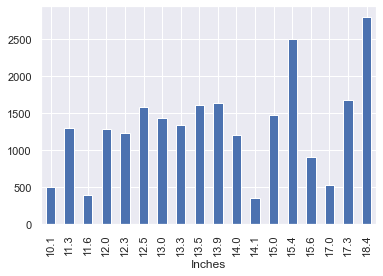

In [53]:
df.groupby('Inches')['Price_euros'].mean().plot.bar()
print('Correlation between Price and Inches is: ',
      df.corr().loc['Price_euros', 'Inches'])

### Weight

- I am not sure if this is an indicator of a strong relationship, We will take a closer look at the relation
- during Feature Selection section. Also, The feature signals a lot of noise, discretisation is adviced

Correlation between the weight of a laptop and its price is:  0.21036979891687152


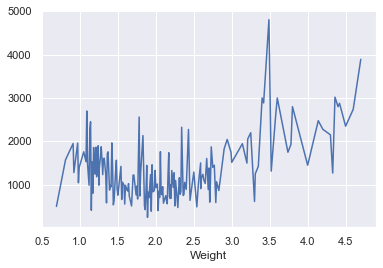

In [54]:
# Creating a new copy of the dataframe for safe manipulation.
new = df.copy()

# Cleaning the Weight feature as a numerical for ease of Visulaization Analysis.
new['Weight'] = new['Weight'].str.replace('kg', '').astype(float)

# Through a linear visualization, comparing the weight to the price.
new.groupby('Weight')['Price_euros'].mean().plot()

# The direct correlation.
print("Correlation between the weight of a laptop and its price is: ",
      new.corr().loc['Price_euros', 'Weight'])

### GPU

In [56]:
# Creating a new copy of the dataframe for safe manipulation.
new = df.copy()

# Extracting a new feature, Type of the GPU, would be a great representation to compare to the Price.
new['Gpu_type'] = new['Gpu'].apply(lambda x: ' '.join(x.split()[0:3]))

# Grouping by the type for better understanding of the relation to the price.
new.groupby('Gpu_type')['Price_euros'].mean().sort_values(ascending=False)

Gpu_type
Nvidia Quadro M3000M      3949.400000
Nvidia Quadro M2000M      3379.500000
Nvidia Quadro M2200M      3146.000000
Nvidia Quadro M620M       2999.000000
Nvidia GeForce GTX1080    2968.000000
Nvidia Quadro 3000M       2968.000000
AMD FirePro W6150M        2899.000000
Nvidia GTX 980            2799.000000
AMD Radeon Pro            2611.806667
Nvidia Quadro M520M       2577.000000
Nvidia Quadro M1200       2291.901111
Nvidia GeForce 960M       2250.680000
Nvidia Quadro M2200       2241.950000
Intel Iris Pro            2139.970000
Nvidia Quadro M500M       2050.380000
Nvidia Quadro M1000M      1984.500000
Nvidia Quadro M620        1969.400000
AMD Radeon 540            1799.000000
Intel Iris Plus           1795.569000
Intel Iris Graphics       1725.633333
Nvidia GeForce GTX        1651.327957
Nvidia GeForce GTX1050    1504.000000
Nvidia GeForce 930M       1403.666667
AMD FirePro W5130M        1369.000000
Nvidia GeForce GT         1360.202000
Nvidia GeForce GTX1060    1339.000000
AMD

- GPU type seems like a good indicator of price
- I would go with one-hot-encoding, though types with less than 3 observation would be encoded as 'Rare Category'

In [57]:
# More Understanding of the GPU type feature, with viewing the Count and Mean for better understanding of the Balance
# Between the labels
new.groupby('Gpu_type')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Gpu_type,,,,,,,,
AMD FirePro W4190M,3.0,1306.000000,173.484870,1154.00,1211.5000,1269.000,1382.0000,1495.00
AMD FirePro W5130M,1.0,1369.000000,NaN,1369.00,1369.0000,1369.000,1369.0000,1369.00
AMD FirePro W6150M,1.0,2899.000000,NaN,2899.00,2899.0000,2899.000,2899.0000,2899.00
AMD R17M-M1-70,1.0,813.000000,NaN,813.00,813.0000,813.000,813.0000,813.00
AMD R4 Graphics,1.0,399.000000,NaN,399.00,399.0000,399.000,399.0000,399.00
AMD Radeon 520,17.0,606.082353,105.985563,438.69,499.0000,619.000,677.3500,767.80
AMD Radeon 530,41.0,864.479512,230.100946,399.00,719.0000,870.000,985.0000,1396.00
AMD Radeon 540,1.0,1799.000000,NaN,1799.00,1799.0000,1799.000,1799.0000,1799.00
AMD Radeon Pro,3.0,2611.806667,218.709752,2439.97,2488.7100,2537.450,2697.7250,2858.00


### Ram

Correlation between the Ram of a laptop and its price is:  0.7430071352506946


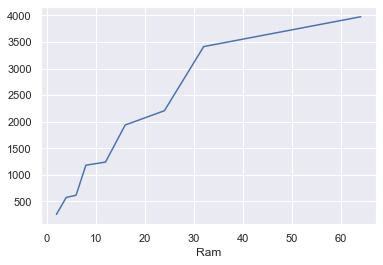

In [58]:
# Creating a new copy of the dataframe for safe manipulation.
new = df.copy()

# Cleaning the Ram feature as a numerical for ease of Visulaization Analysis.
new['Ram'] = new['Ram'].str.replace('GB', '').astype(float)

# Plotting the relation between the Ram and Price.
new.groupby('Ram')['Price_euros'].mean().plot()

# The direct relation between the Ram and Price.
print("Correlation between the Ram of a laptop and its price is: ",
      new.corr().loc['Price_euros', 'Ram'])

- WOW! A great indicator of Price.
- Probably does not need many work.

### CPU

In [12]:
# Viewing the unique values of the CPU
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [59]:
# Creating a new copy of the dataframe for safe manipulation.
new = df.copy()

# Extracting new features Types and Speeds for ease of Analysis
new['Cpu_type'] = new['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
new['Cpu_speed'] = new['Cpu'].apply(lambda x: x.split()[-1].replace('GHz', ''))

In [60]:
# Viewing the direct relation between the type of CPU and Average of Price for better understanding of the relation
new.groupby('Cpu_type')['Price_euros'].mean().sort_values(ascending = False)

Cpu_type
Intel Xeon E3-1535M         4644.000000
Intel Xeon E3-1505M         2524.000000
AMD Ryzen 1600              1695.000000
AMD Ryzen 1700              1682.333333
Intel Core i7               1595.779108
Intel Core M                1324.231579
Intel Core i5               1015.015248
AMD FX 8800P                 999.000000
AMD FX 9830P                 699.000000
Samsung Cortex A72&A53       659.000000
AMD A12-Series 9720P         658.795714
AMD A9-Series A9-9420        649.500000
AMD A12-Series 9700P         629.000000
AMD A10-Series 9620P         617.005000
AMD A10-Series A10-9620P     571.950000
Intel Pentium Dual           565.300000
AMD A9-Series 9410           549.990000
Intel Core i3                541.625956
AMD A10-Series 9600P         534.000000
Intel Atom x5-Z8550          498.317500
AMD A6-Series A6-9220        462.395000
AMD A8-Series 7410           448.500000
AMD A9-Series 9420           445.824167
Intel Pentium Quad           421.122222
AMD A6-Series 9220           40

In [15]:
# Description of the relation between the types and mean, count of Price
new.groupby('Cpu_type')['Price_euros'].describe()

,count,mean,std,min,25%,50%,75%,max
Cpu_type,,,,,,,,
AMD A10-Series 9600P,2.0,534.000000,49.497475,499.00,516.5000,534.000,551.5000,569.00
AMD A10-Series 9620P,2.0,617.005000,53.747186,579.00,598.0025,617.005,636.0075,655.01
AMD A10-Series A10-9620P,2.0,571.950000,4.313351,568.90,570.4250,571.950,573.4750,575.00
AMD A12-Series 9700P,1.0,629.000000,NaN,629.00,629.0000,629.000,629.0000,629.00
AMD A12-Series 9720P,7.0,658.795714,194.667817,429.00,539.0000,597.570,779.0000,949.00
AMD A4-Series 7210,1.0,379.000000,NaN,379.00,379.0000,379.000,379.0000,379.00
AMD A6-Series 7310,1.0,298.000000,NaN,298.00,298.0000,298.000,298.0000,298.00
AMD A6-Series 9220,8.0,403.811250,59.541192,309.00,390.7500,398.745,409.0000,519.00
AMD A6-Series A6-9220,2.0,462.395000,23.327453,445.90,454.1475,462.395,470.6425,478.89


<AxesSubplot:xlabel='Cpu_type'>

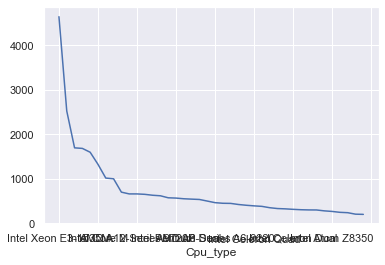

In [61]:
# Plotting the relation between type of CPU and average price.
# Linear relationship
new.groupby('Cpu_type')['Price_euros'].mean().sort_values(ascending = False).plot()

<AxesSubplot:xlabel='Cpu_speed'>

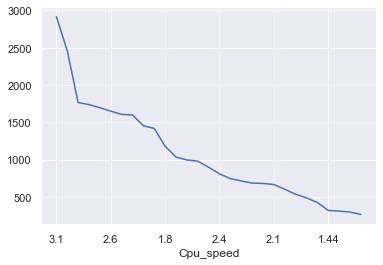

In [62]:
# Plotting the relation between speed of CPU and average price.
# Linear relationship
new.groupby('Cpu_speed')['Price_euros'].mean().sort_values(ascending = False).plot()

- CPU type seems like a good indicator of price
- I would go with ordinal encoding for type, though types with less than 3 observation would be encoded as 'Rare Category'

# Feature Extraction, Preparation, and Rare Labeling

In [19]:
# function for rare label encoding
def rare_labels(df, feature, threshhold):
    '''
    A function for changing the category of labels less than the threshhold as 'Other'
    @param DataFrame, feature, threshhold
    @return A rare-encoded feature df[feature]
    '''
    counts = df[feature].value_counts()
    # Recording the value counts of each categorical label in the feature

    common = list(counts[counts > threshhold].index)

    # Filtering the common labels based on the chosen threshhold, dicided by user.

    def rare(x):
        '''
        A sub-function for labeling the rare values based on the common ones previously dicided on.
        @param: An observation from the feature column
        @return: either 'Other', the original observation, based on either being within the common or not.
        '''
        return 'other' if x not in common else x

    df[feature] = df[feature].apply(rare)
    # overwriting the original feature column
    return df[feature]


def diagnostic_plots(df, var):
    '''
    A function for plotting kde, boxplot, and distribution plots
    Aimed at disgnosing 
    1. skewed/not normal distributions
    2. Outliers

    @param DataFrame, feature
    '''
    # Editing the size and resolution of the plots
    plt.figure(figsize=(12, 7), dpi=200)
    
    # KDE plotting for distribution
    plt.subplot(1, 3, 1)
    df[var].plot.kde()

    # Boxplot fot distribution and Outliers
    plt.subplot(1, 3, 2)
    df.boxplot(column=var)

    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[var], dist="norm", plot=plt)

    plt.show()

### Inches

- The unique values of the Inches are various, discretisation would be great
- Accumelating the Inches with rounding the Inches features, for all observations, to 0 Decimal points.

<AxesSubplot:xlabel='Inches'>

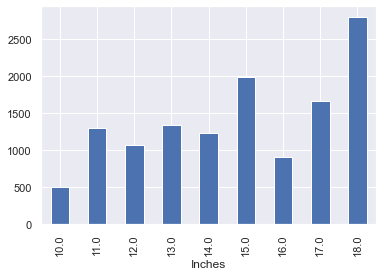

In [63]:
# Rounding the inches of the laptop as means of Discretisation.
df['Inches'] = np.round(df['Inches'], decimals=0)

# Reviewing the relation after Discretisation, Proving Linear relationship
df.groupby('Inches')['Price_euros'].mean().plot.bar()

### ScreenResolution

- The ScreenResolution feature is extracted into 4 features

1.   Y_res: Vertical length of the screen
2.   X_res: Horizontal length of the screen
3.   ScreenResolution: The area/size of the screen
4.   PPI: Measure of pixel density or resolution of a computer screen (https://www.calculatorsoup.com/calculators/technology/ppi-calculator.php#:~:text=PPI%20is%20a%20measure%20of,and%20total%20number%20in%20megapixels.)


In [22]:
# Splitting the original feature with a maximum splits of 1, around character 'x', and explanding them into two variables
resolution = df['ScreenResolution'].str.split('x', n=1, expand=True)

# Choosing the variables and Making sure the Y_res in a Integer,
df['Y_res'] = resolution[1].astype(int)

# Choosing the variable and finding the numerical charachters within the series And casting as Integer
df["X_res"] = resolution[0].str.findall('\d+\.?\d+').apply(
    lambda x: pd.Series(x).astype(int))

# Acquiring the full size of the screen through multiplication.
df["ScreenResolution"] = (df["X_res"] * df["Y_res"]).astype(int)

# Calulating the actual quality of the screen through PPI
df['PPI'] = (((df['X_res'])**2) + ((df['Y_res'])**2)**0.5) / df['Inches']

### Weight

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [23]:
# Cleaning the Weight feature as a numerical for compatibility with modeling.
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# discretisation to get rid of noise, though pd.cut method.
df['Weight'] = pd.cut(x=df['Weight'],
                      bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
                      labels=[1, 2, 3, 4, 5]).astype(int)

### Ram

In [24]:
# Cleaning the Weight feature as a numerical for compatibility with modeling.
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

### CPU

In [25]:
# Extracting new features Types and Speeds for ease of Analysis
df['Cpu_type'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df['Cpu_speed'] = df['Cpu'].apply(
    lambda x: x.split()[-1].replace('GHz', '')).astype(float)

# Rare labeling using Pre-created Function CPU type for more compatibility with Tree-based models
# Tree based models could, wrongly, favor high cardinal variables and give them more importance when splitting nodes.
df['Cpu_type'] = rare_labels(df, 'Cpu_type', 2)

# Dropping the old and complicated CPU feature
df.drop('Cpu', axis=1, inplace=True)

https://towardsdatascience.com/high-number-of-unique-values-and-tree-based-models-c30167b63edd

### GPU

In [26]:
# Extracting a new feature, Type of the GPU, would be a great representation to compare to the Price.
df['Gpu_type'] = new['Gpu'].apply(lambda x: ' '.join(x.split()[0:3]))

# Rare labeling using Pre-created Function CPU type for more compatibility with Tree-based models
df['Gpu_type'] = rare_labels(df, 'Gpu_type', 3)

# Dropping the old and complicated GPU feature
df.drop('Gpu', axis=1, inplace=True)

### Memory

In [27]:
# Creating a copy of feature memory for ease of maniplulation
mem = df['Memory'].str.split('+', n=1, expand=True)

# When splitting, not all the second part of the split had values --> Not all of laptops had two memory devices.
# Filling the null values with zero.
mem[1].fillna('0', inplace=True)

# Because the values were taken out of textual phrases, there were a lot of spaces before and after
# We better clean them for consistancy with .strip() method.
mem[0].str.strip()
mem[1].str.strip()

# Defining the memory size of the first harddesk
df['first'] = mem[0].str.replace(r'\D', '', regex=True).astype(int)

# Creating binary columns for memory harddesks {1: 'Available', 0: 'Not Available'}
# If the 1st harddesk is SSD
df['harddesk1SSD'] = mem[0].apply(lambda x: 1 if 'SSD' in x else 0)
# If the 1st harddesk is HDD
df['harddesk1HDD'] = mem[0].apply(lambda x: 1 if 'HDD' in x else 0)
# If the 1st harddesk is Hybrid
df['harddesk1Hybrid'] = mem[0].apply(lambda x: 1 if 'Hybrid' in x else 0)
# If the 1st harddesk is Flash Storage
df['harddesk1FlashStorage'] = mem[0].apply(lambda x: 1
                                           if 'Flash Storage' in x else 0)

# Defining the memory size of the Second harddesk
df['second'] = mem[1].str.replace(r'\D', '', regex=True).astype(int)

# Creating binary columns for memory harddesks {1: 'Available', 0: 'Not Available'}
# If the 2nd harddesk is SSD
df['harddesk2SSD'] = mem[1].apply(lambda x: 1 if 'SSD' in x else 0)
# If the 2nd harddesk is HDD
df['harddesk2HDD'] = mem[1].apply(lambda x: 1 if 'HDD' in x else 0)
# If the 2nd harddesk is Hybrid
df['harddesk2Hybrid'] = mem[1].apply(lambda x: 1 if 'Hybrid' in x else 0)
# If the 2nd harddesk is Flash Storage
df['harddesk2FlashStorage'] = mem[1].apply(lambda x: 1
                                           if 'Flash Storage' in x else 0)

# Overall memory available in the device
df['Memory'] = df['first'] + df['second']

# Calculating how much available memory available for each type of memory harddesk type
df["HDD"] = (df["first"] * df["harddesk1HDD"] +
             df["second"] * df["harddesk2HDD"])
df["SSD"] = (df["first"] * df["harddesk1SSD"] +
             df["second"] * df["harddesk2SSD"])
df["Hybrid"] = (df["first"] * df["harddesk1Hybrid"] +
                df["second"] * df["harddesk2Hybrid"])
df["FlashStorage"] = (df["first"] * df["harddesk1FlashStorage"] +
                      df["second"] * df["harddesk2FlashStorage"])

# Gathering all the created features for maniplulation for ease of getting rid of.
to_drop = [
    'first', 'harddesk1SSD', 'harddesk1HDD', 'harddesk1Hybrid',
    'harddesk1FlashStorage', 'second', 'harddesk2SSD', 'harddesk2HDD',
    'harddesk2Hybrid', 'harddesk2FlashStorage'
]

# Dropping the un-needed features.
df.drop(to_drop, axis=1, inplace=True)

### Campany

In [64]:
# Rare encoding company names based on the most common by the created custome function
df['Company'] = rare_labels(df, 'Company', 20)

# Feature Review

- For ease of preprocessing, features are divided into three categories
1. Oridnal: Features which is recommended to be encoded with relation to the target, the sale price, as they seem to have high correlation and could be a good indicator of the price.
2. One (OneHotEncoding): Features to be encoded with OneHotEncoding
3. continuous: Continuous numerical features to be tested for Linear model assumptions for high quality fitting,

In [29]:
ordinal = ['Gpu_type', 'Cpu_type']

one = ['Company', 'TypeName']

continuous = [
    'Inches', 'ScreenResolution', 'Ram', 'Memory', 'Weight', 'Y_res', 'X_res',
    'PPI', 'Cpu_speed'
]

df.drop(['laptop_ID', 'Product', 'OpSys'], axis=1, inplace=True)

### Continuous Features Diagnosis

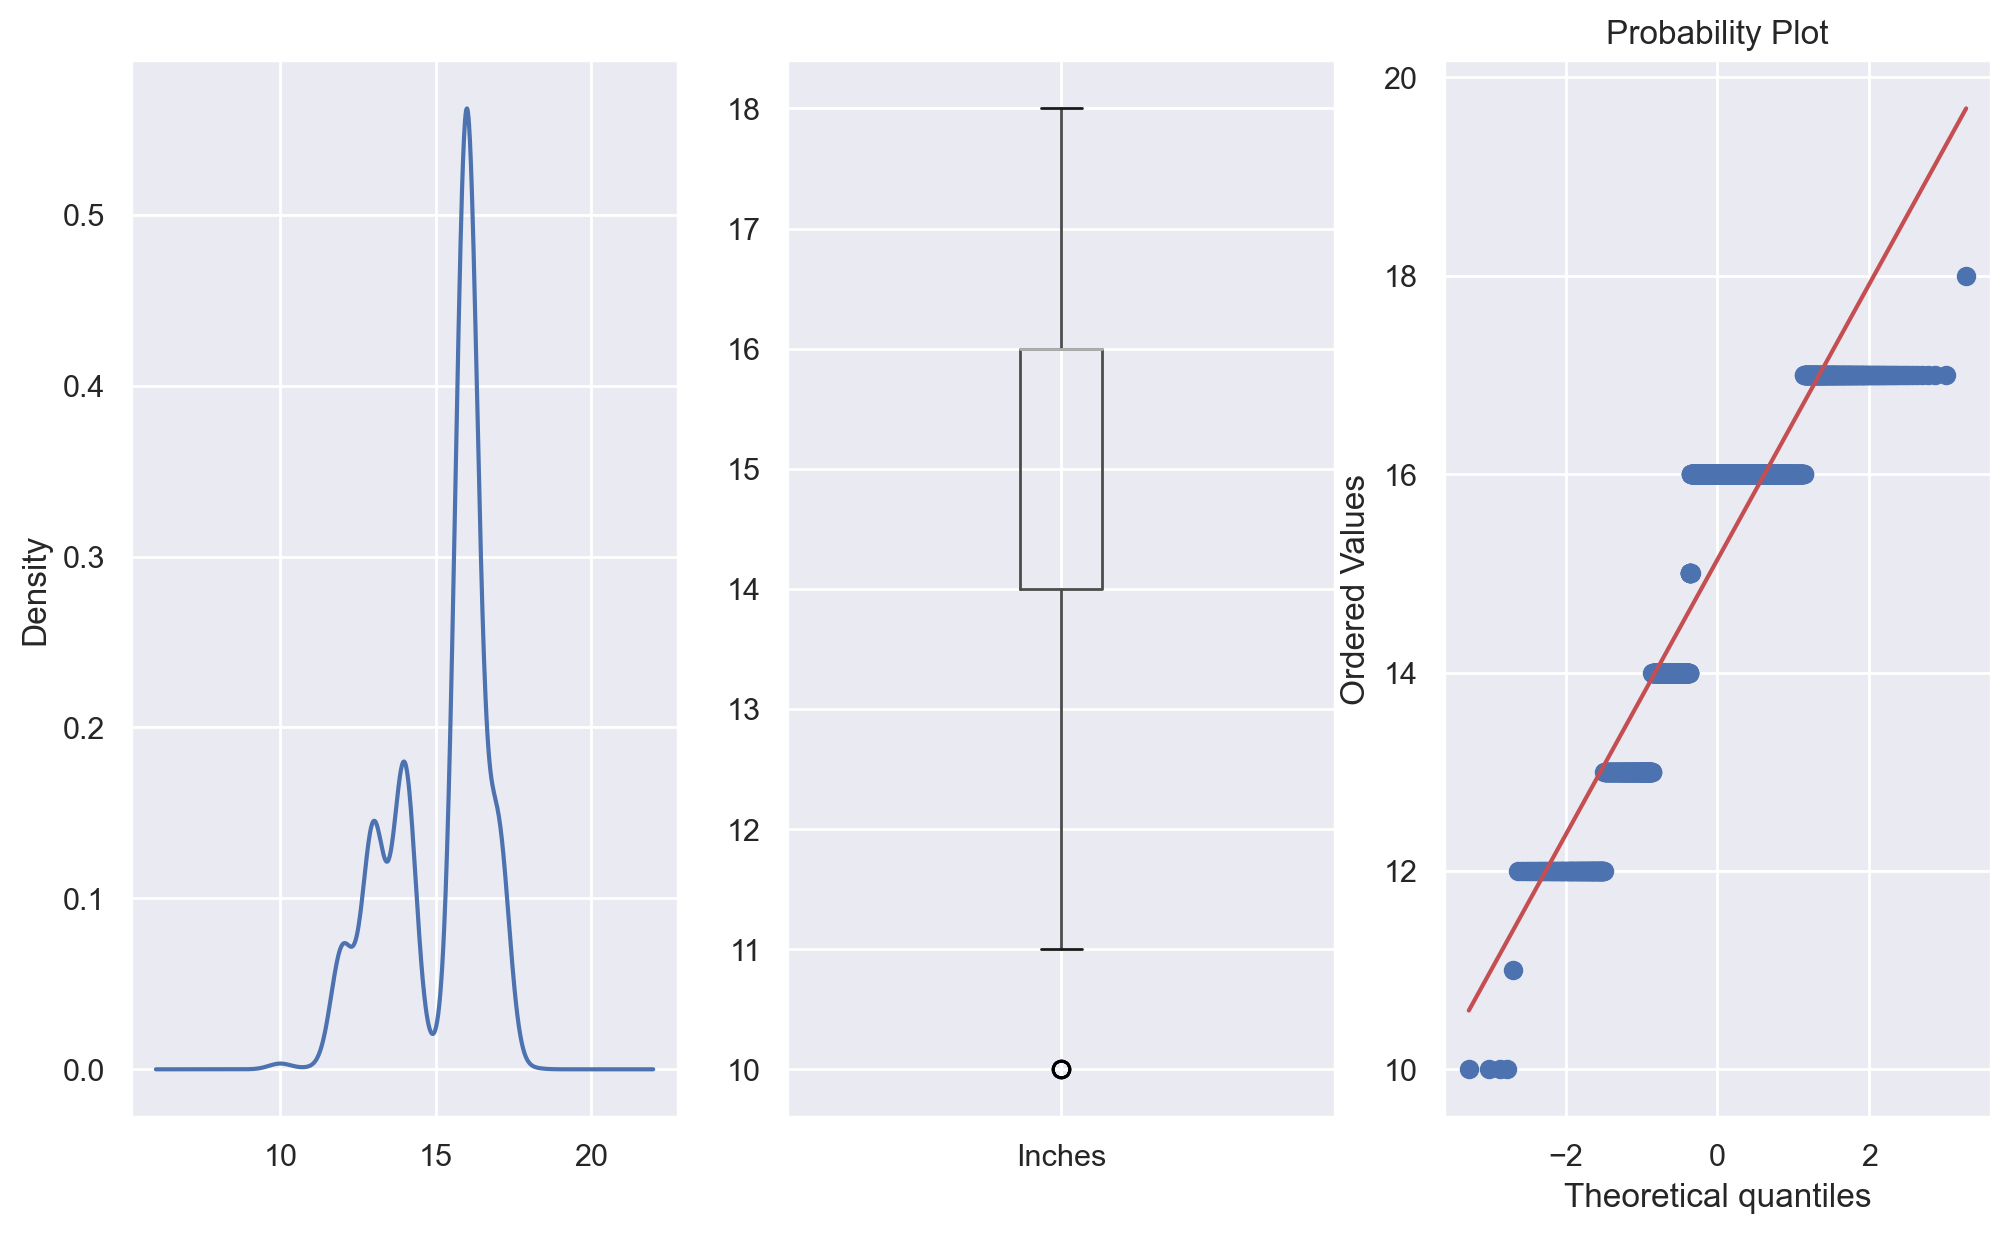

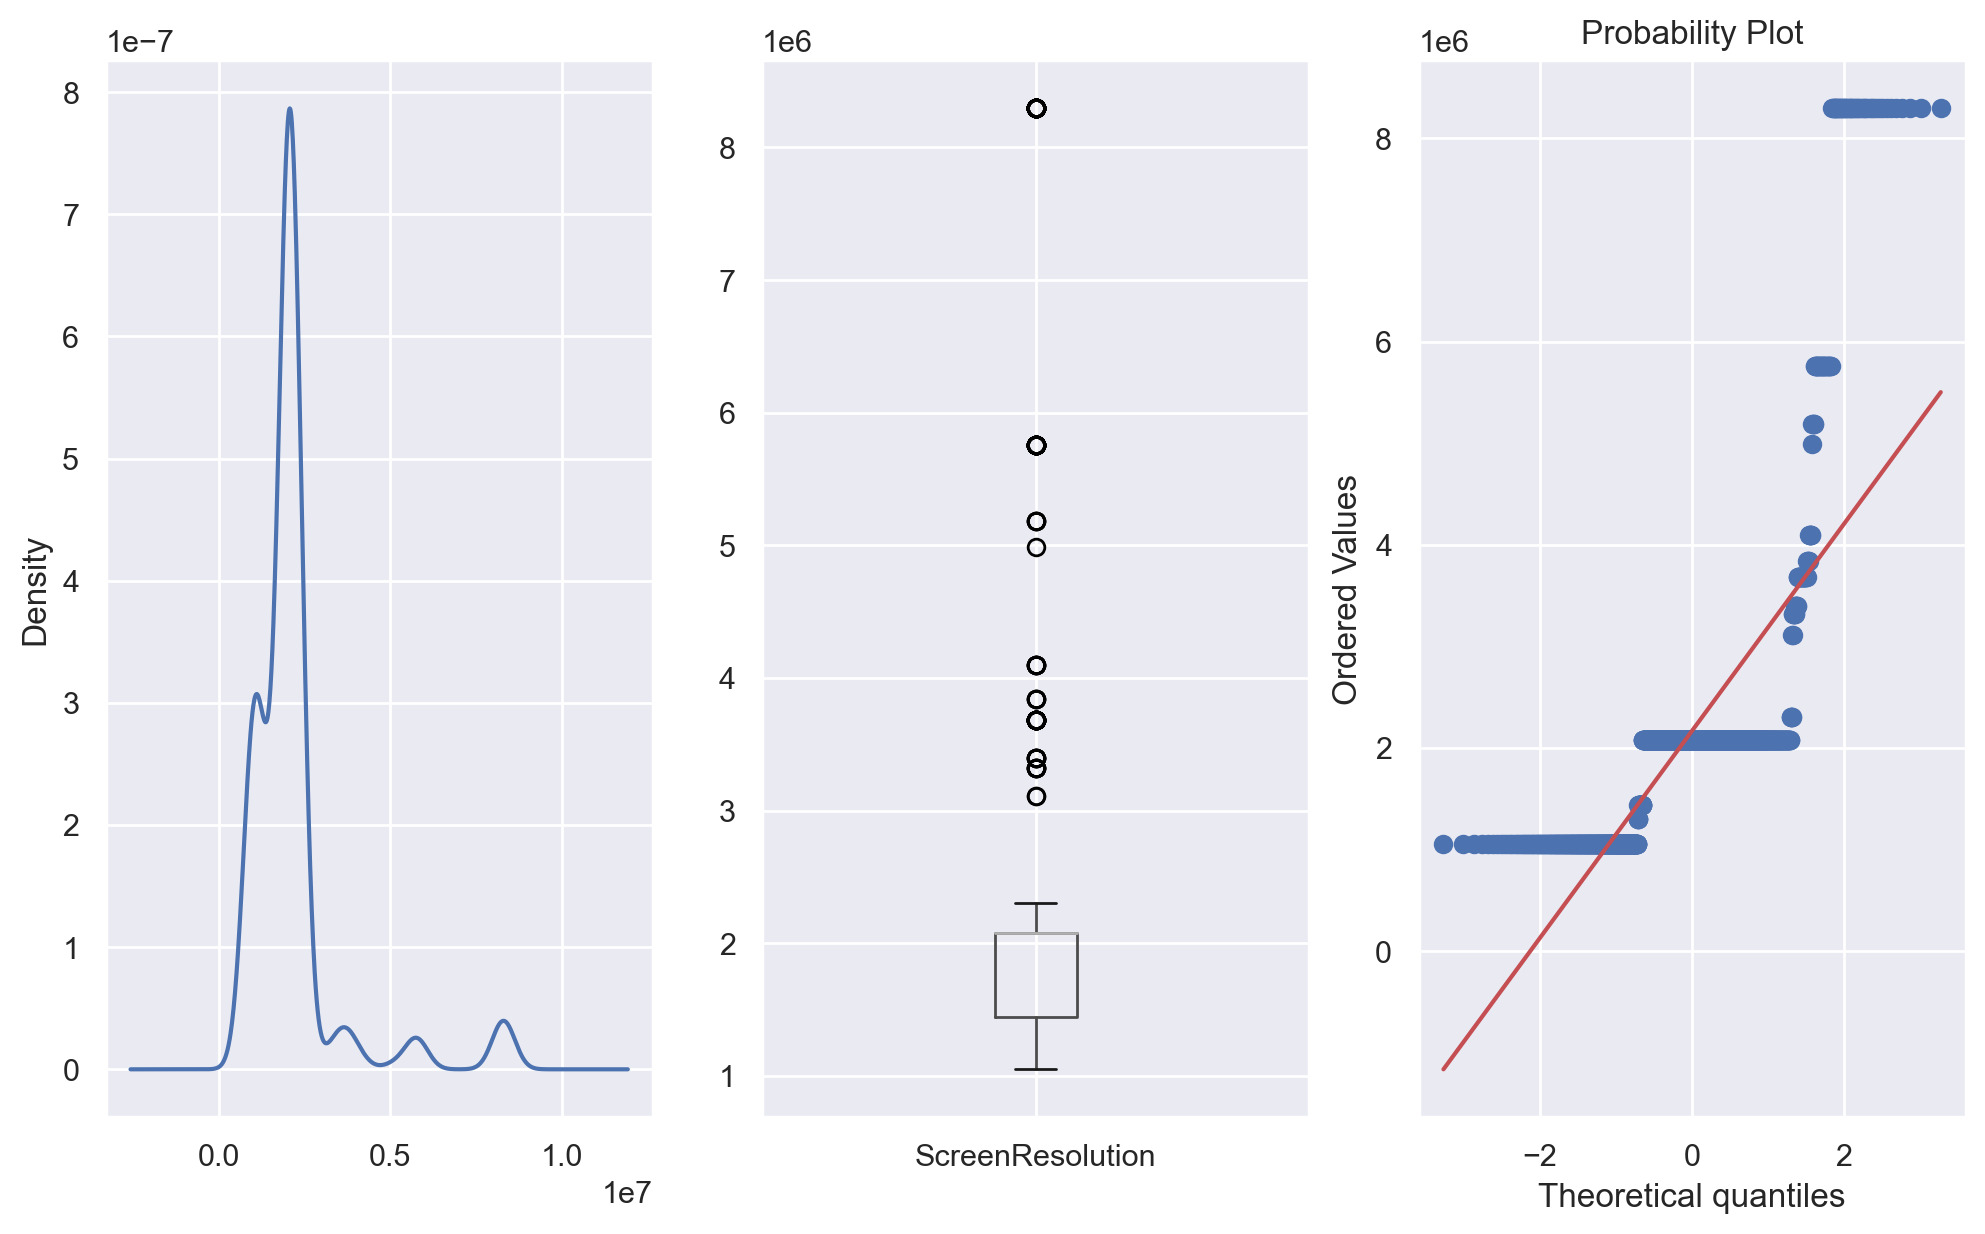

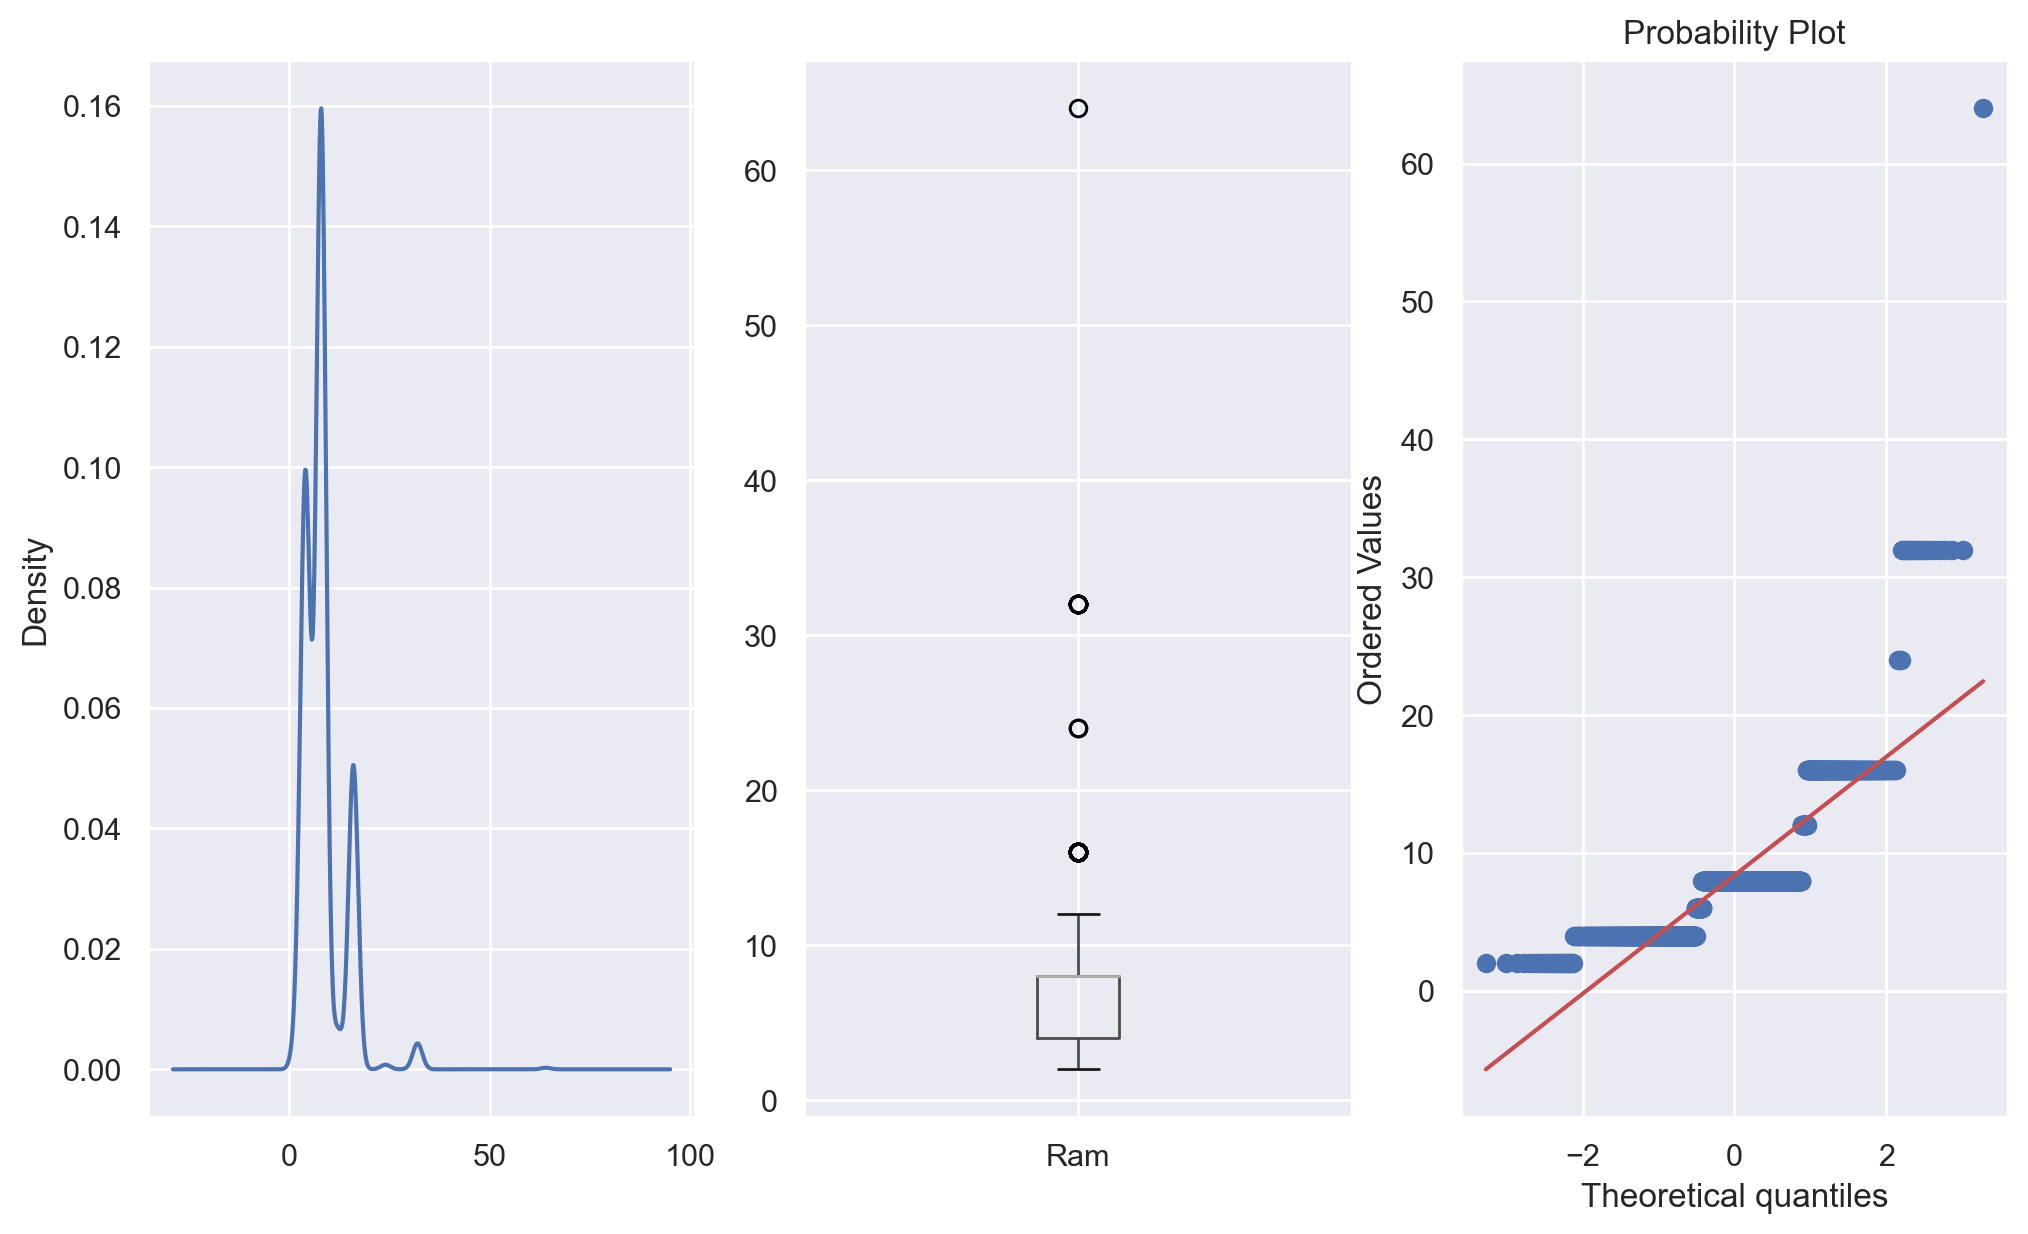

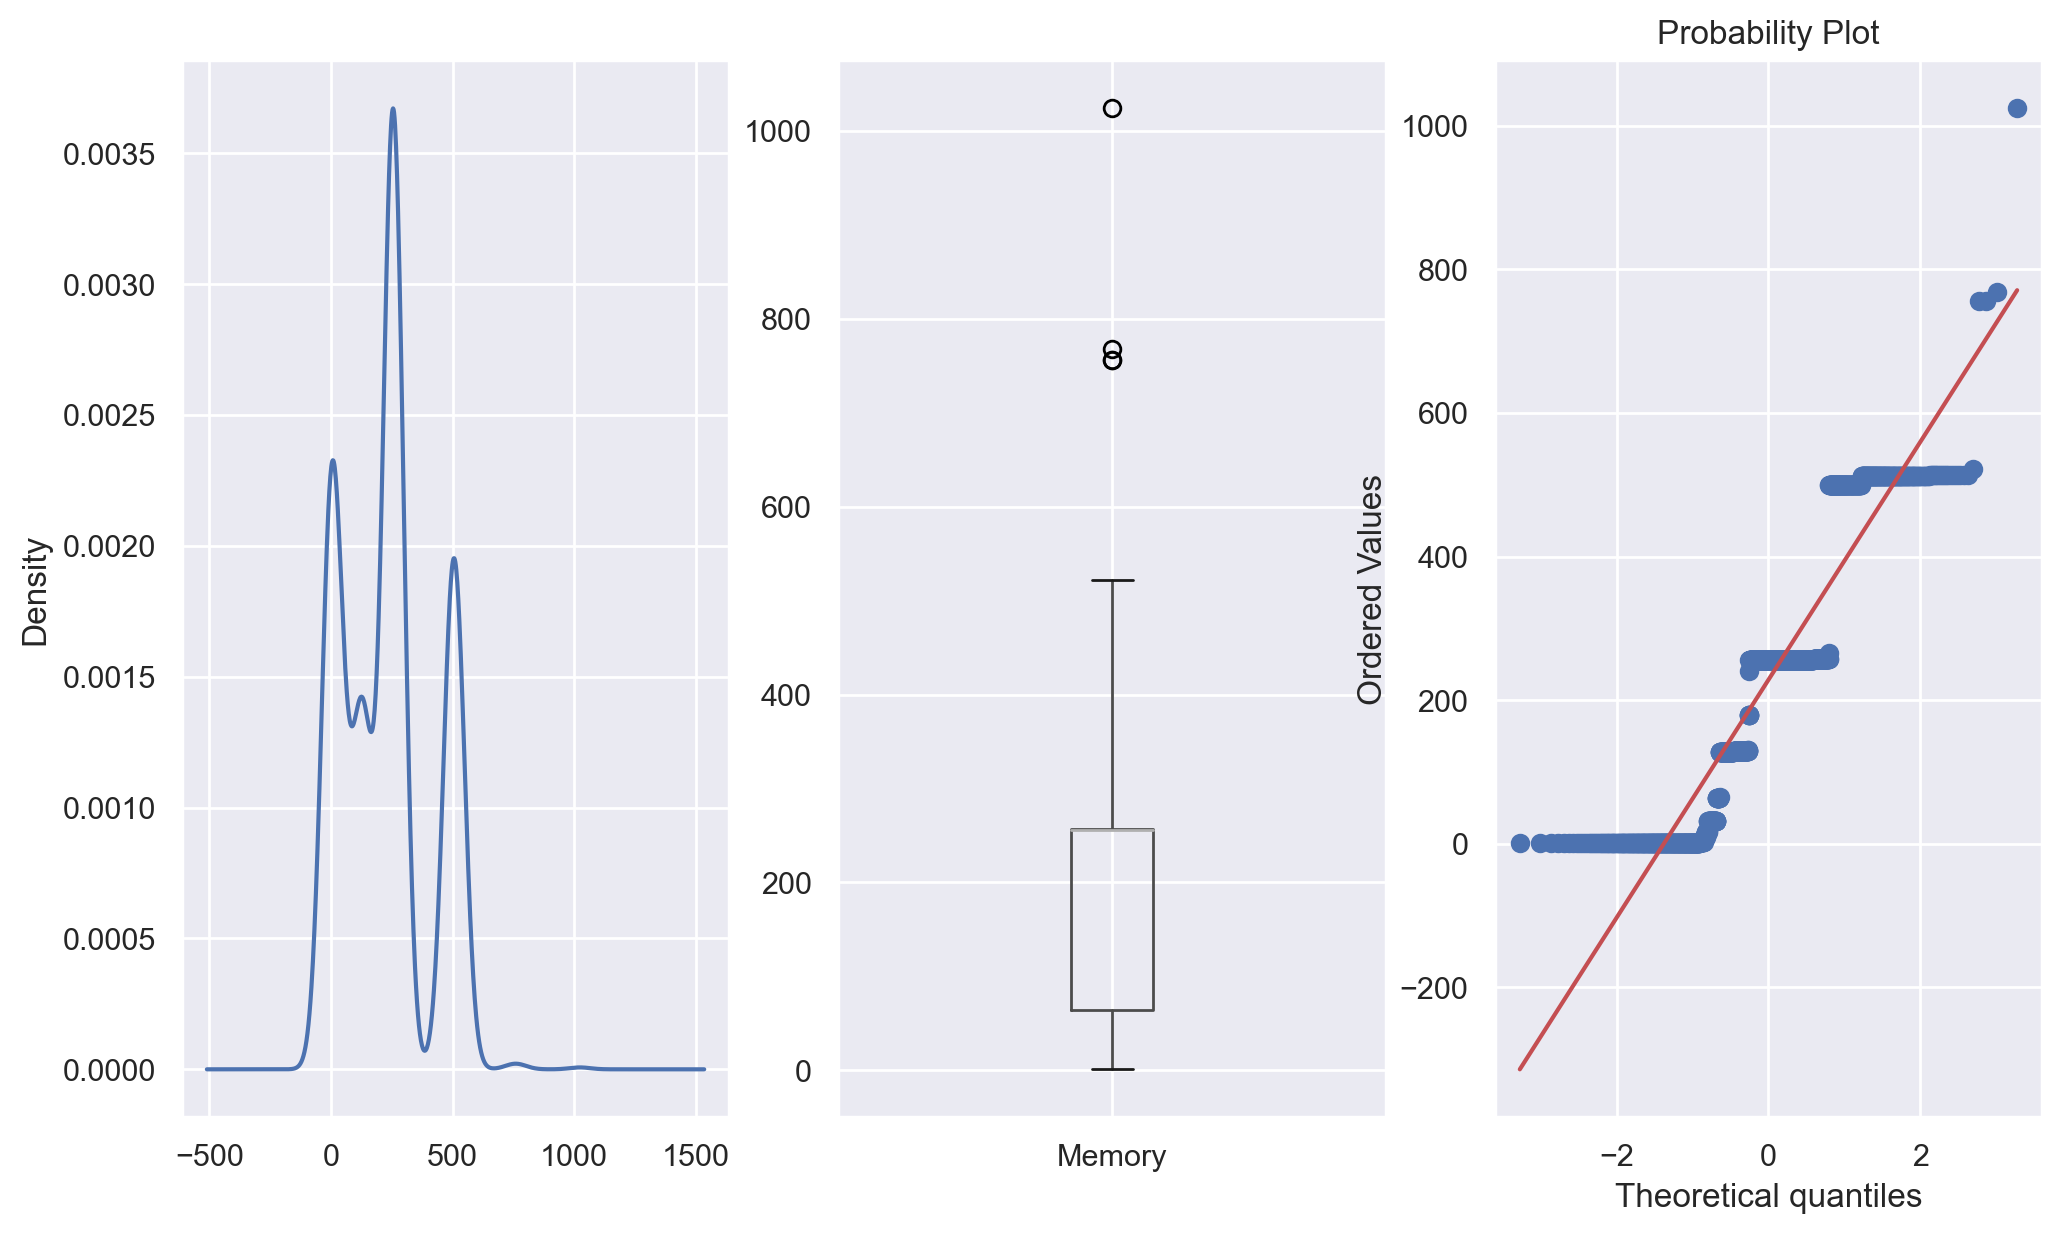

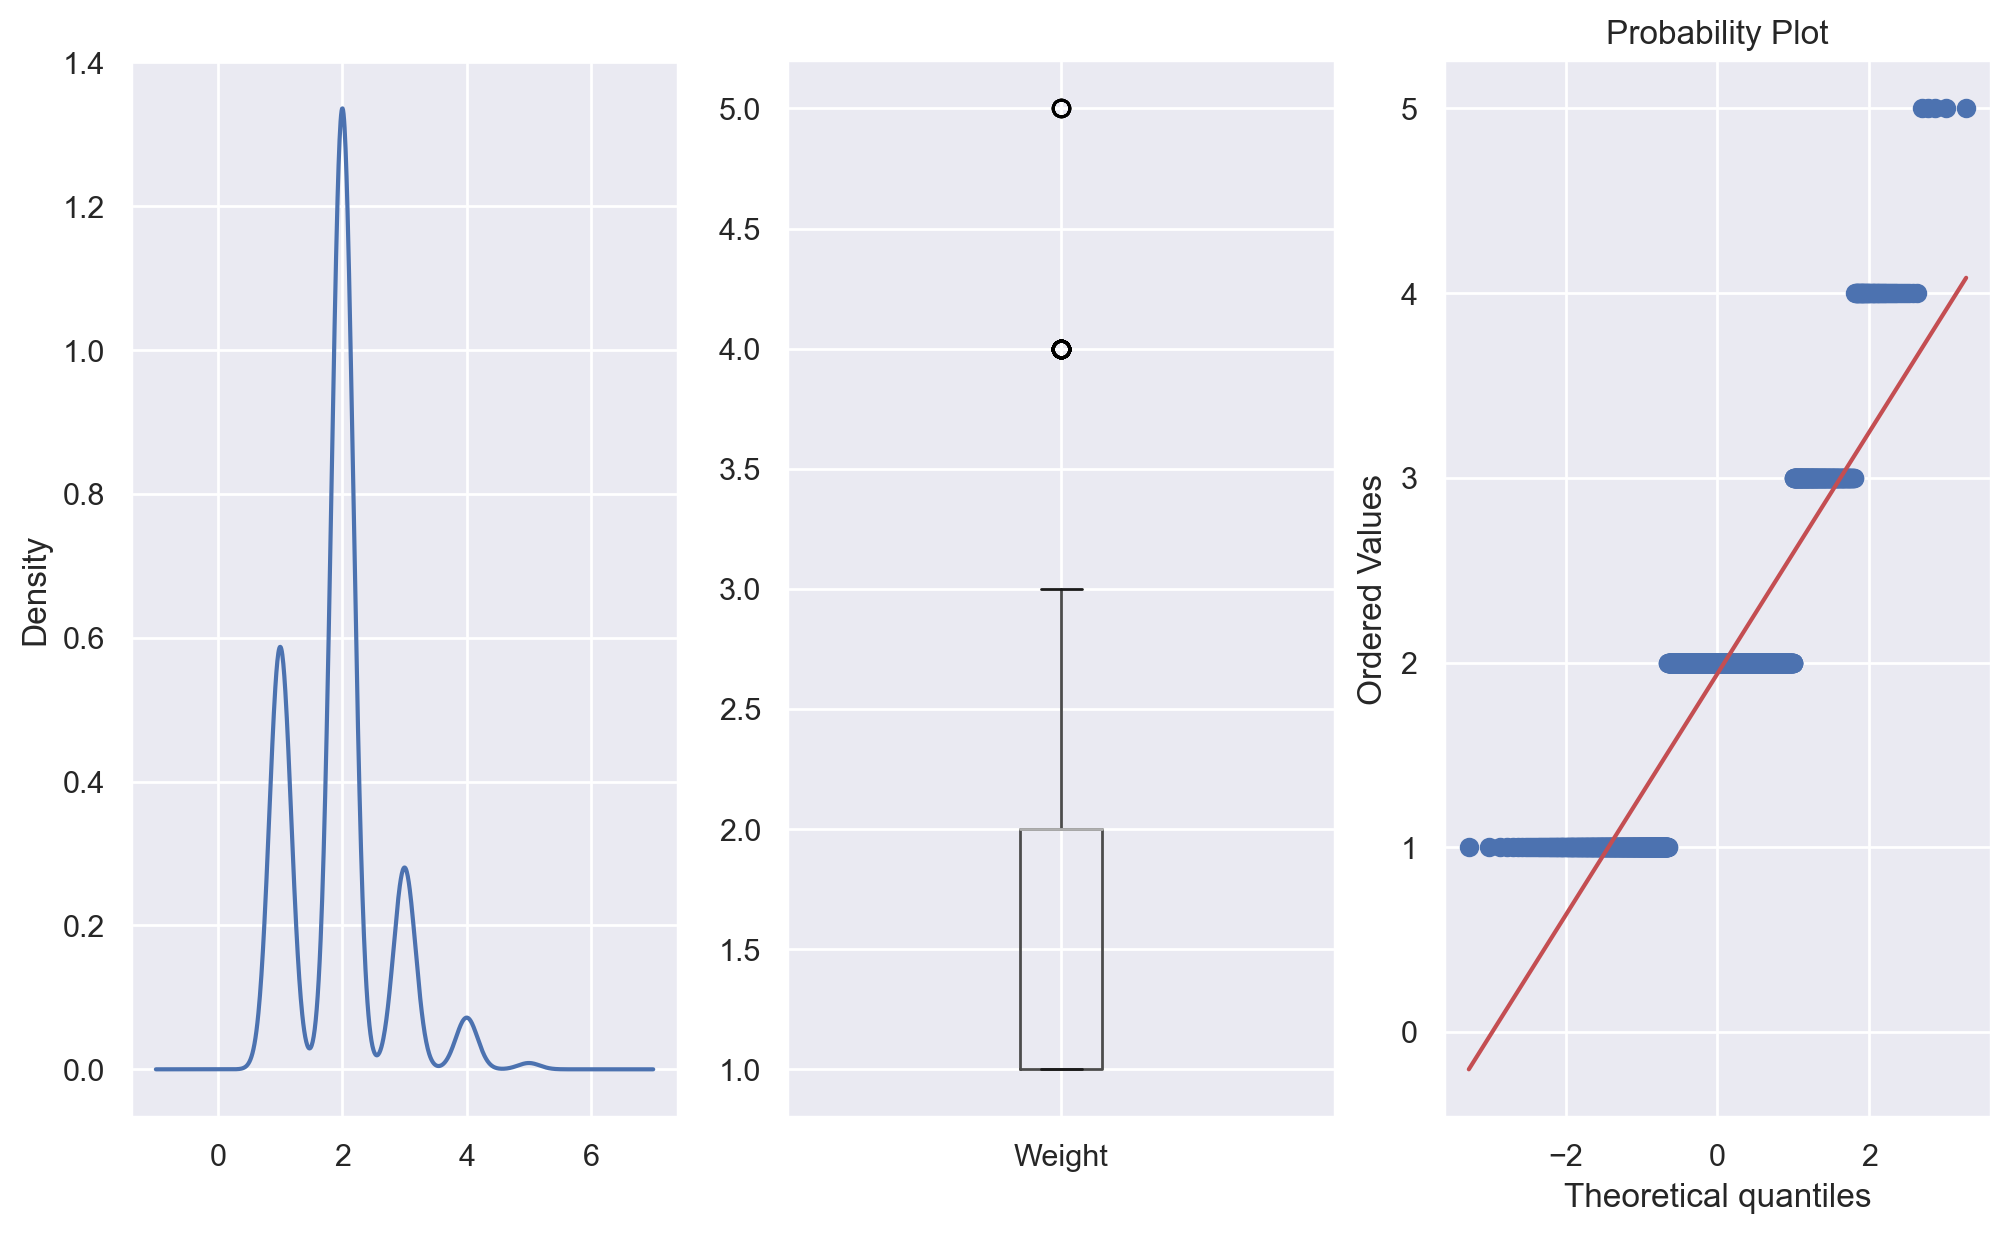

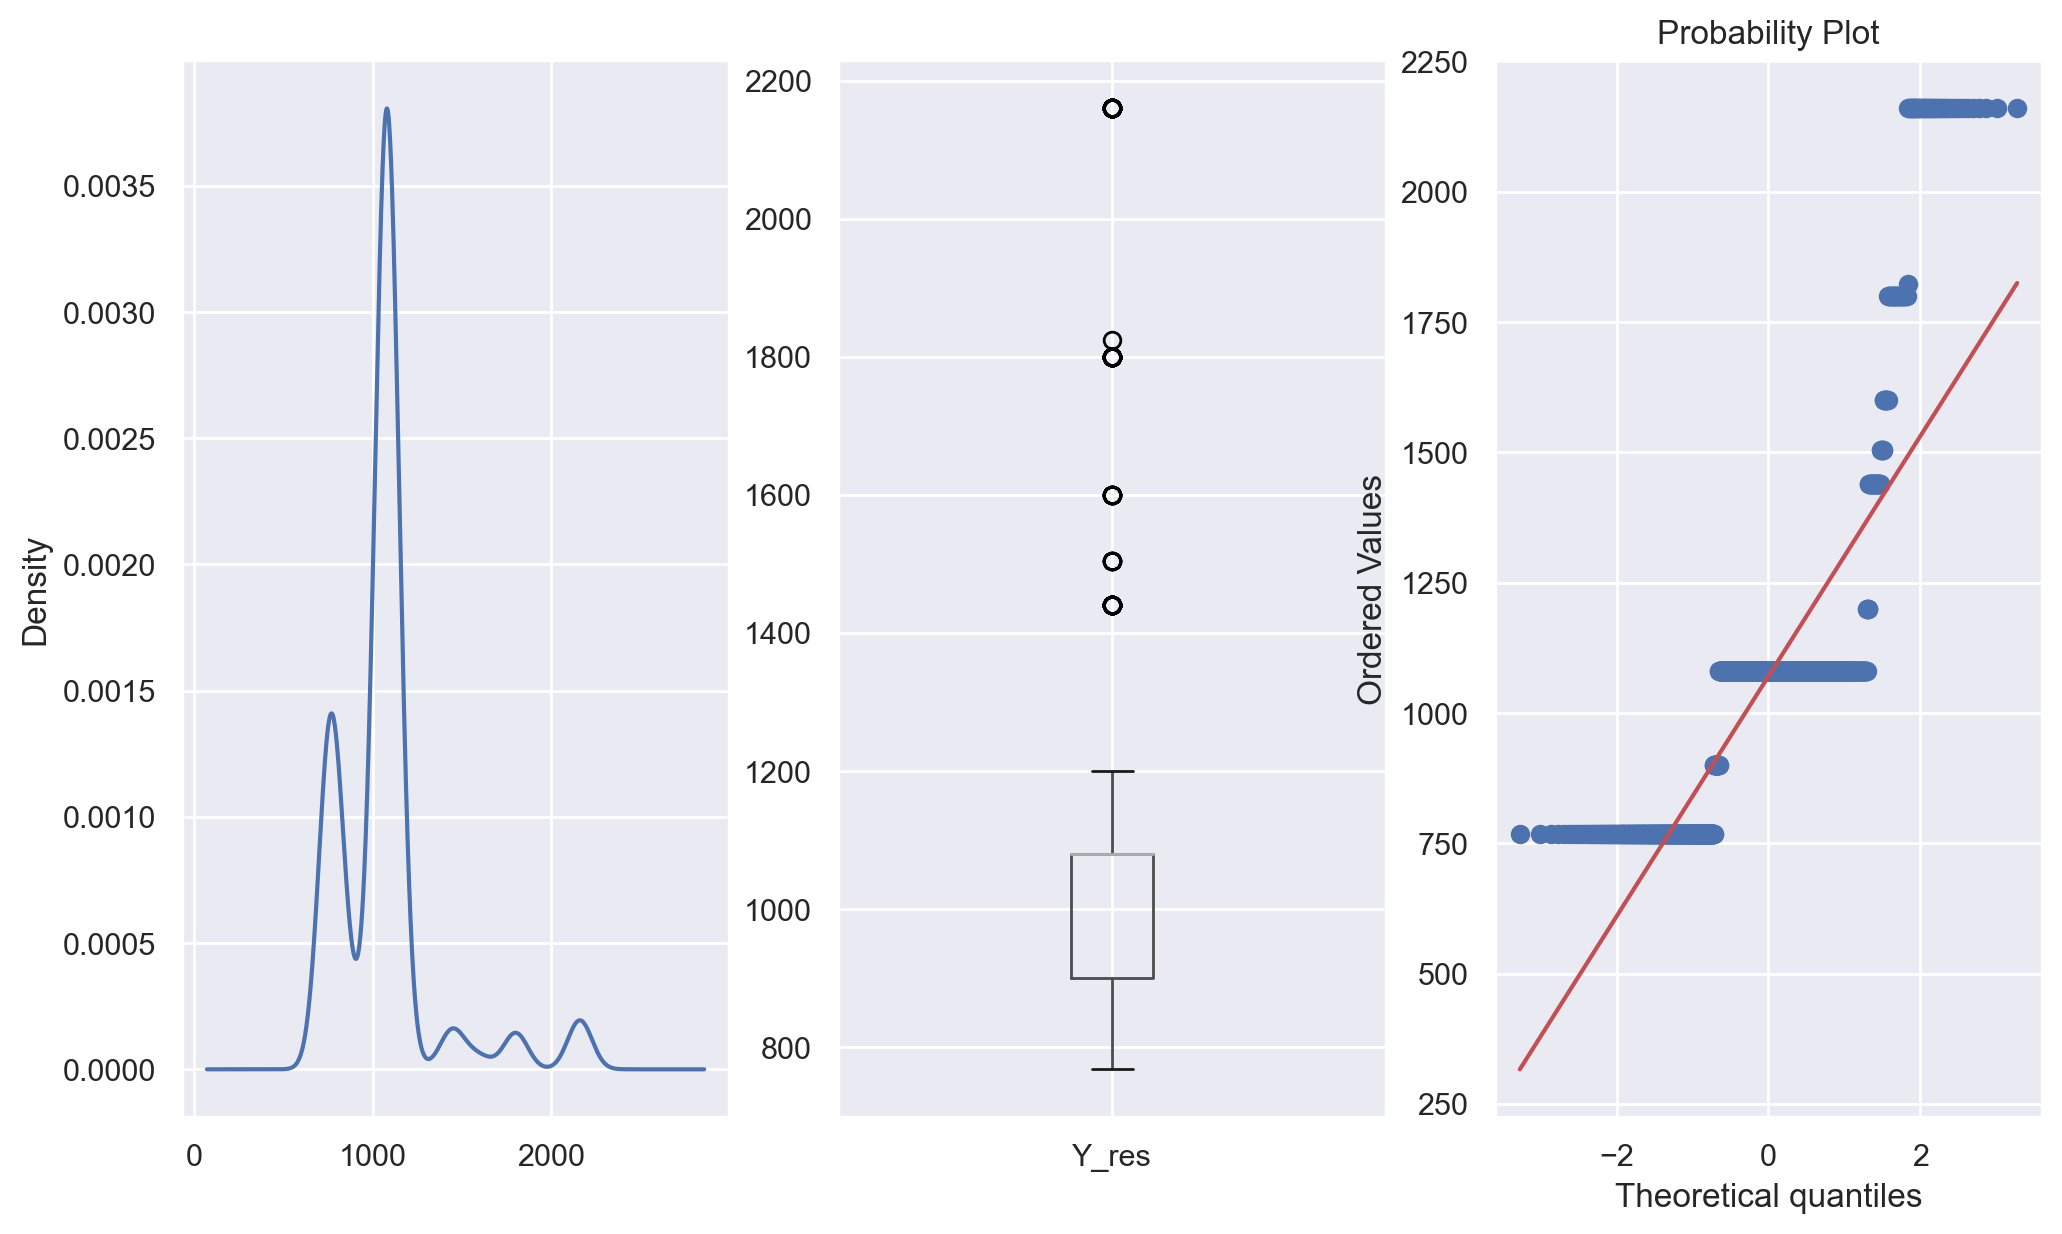

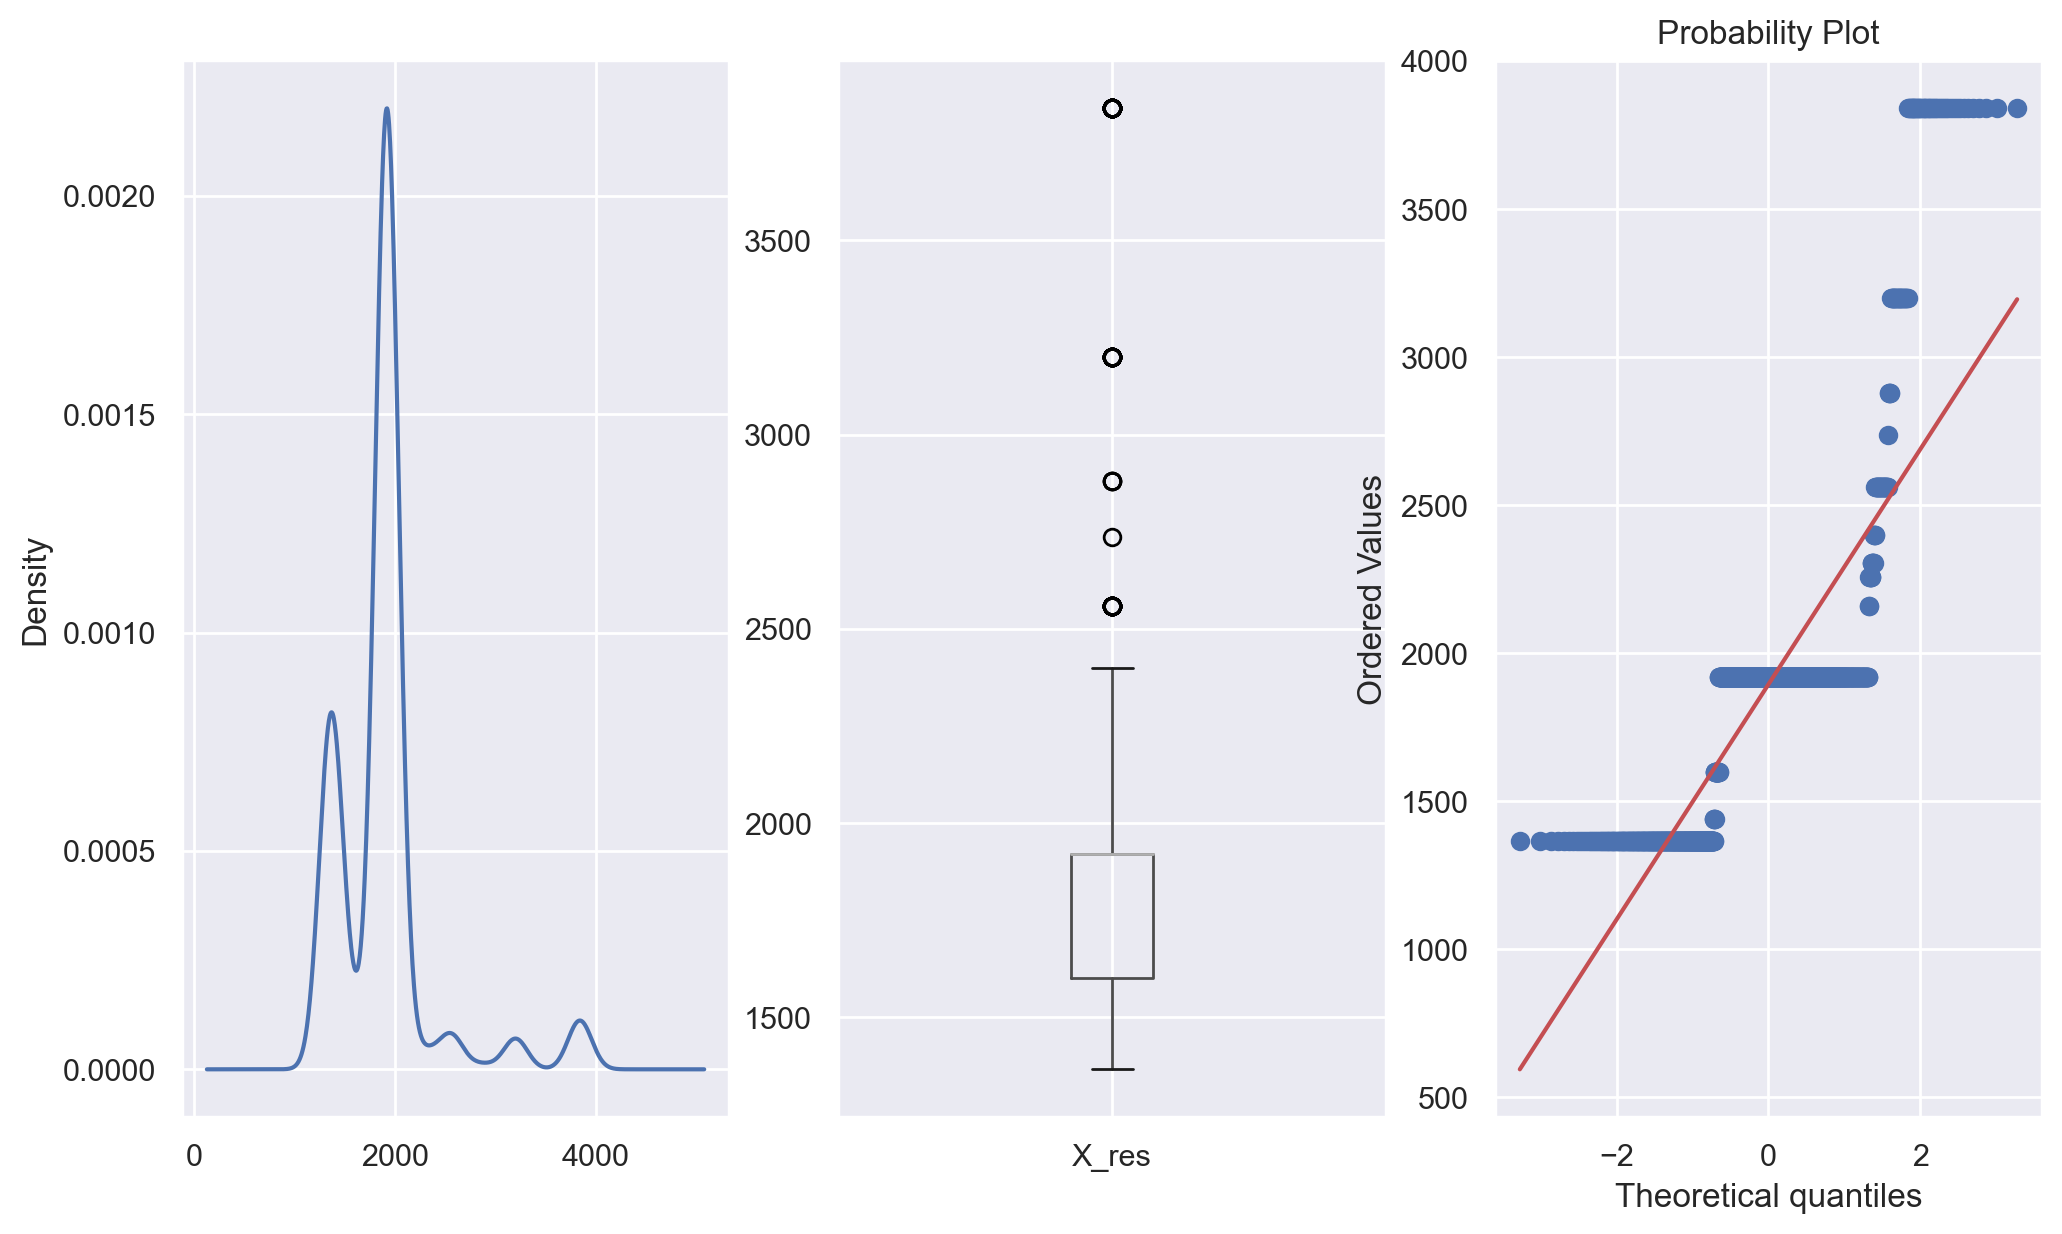

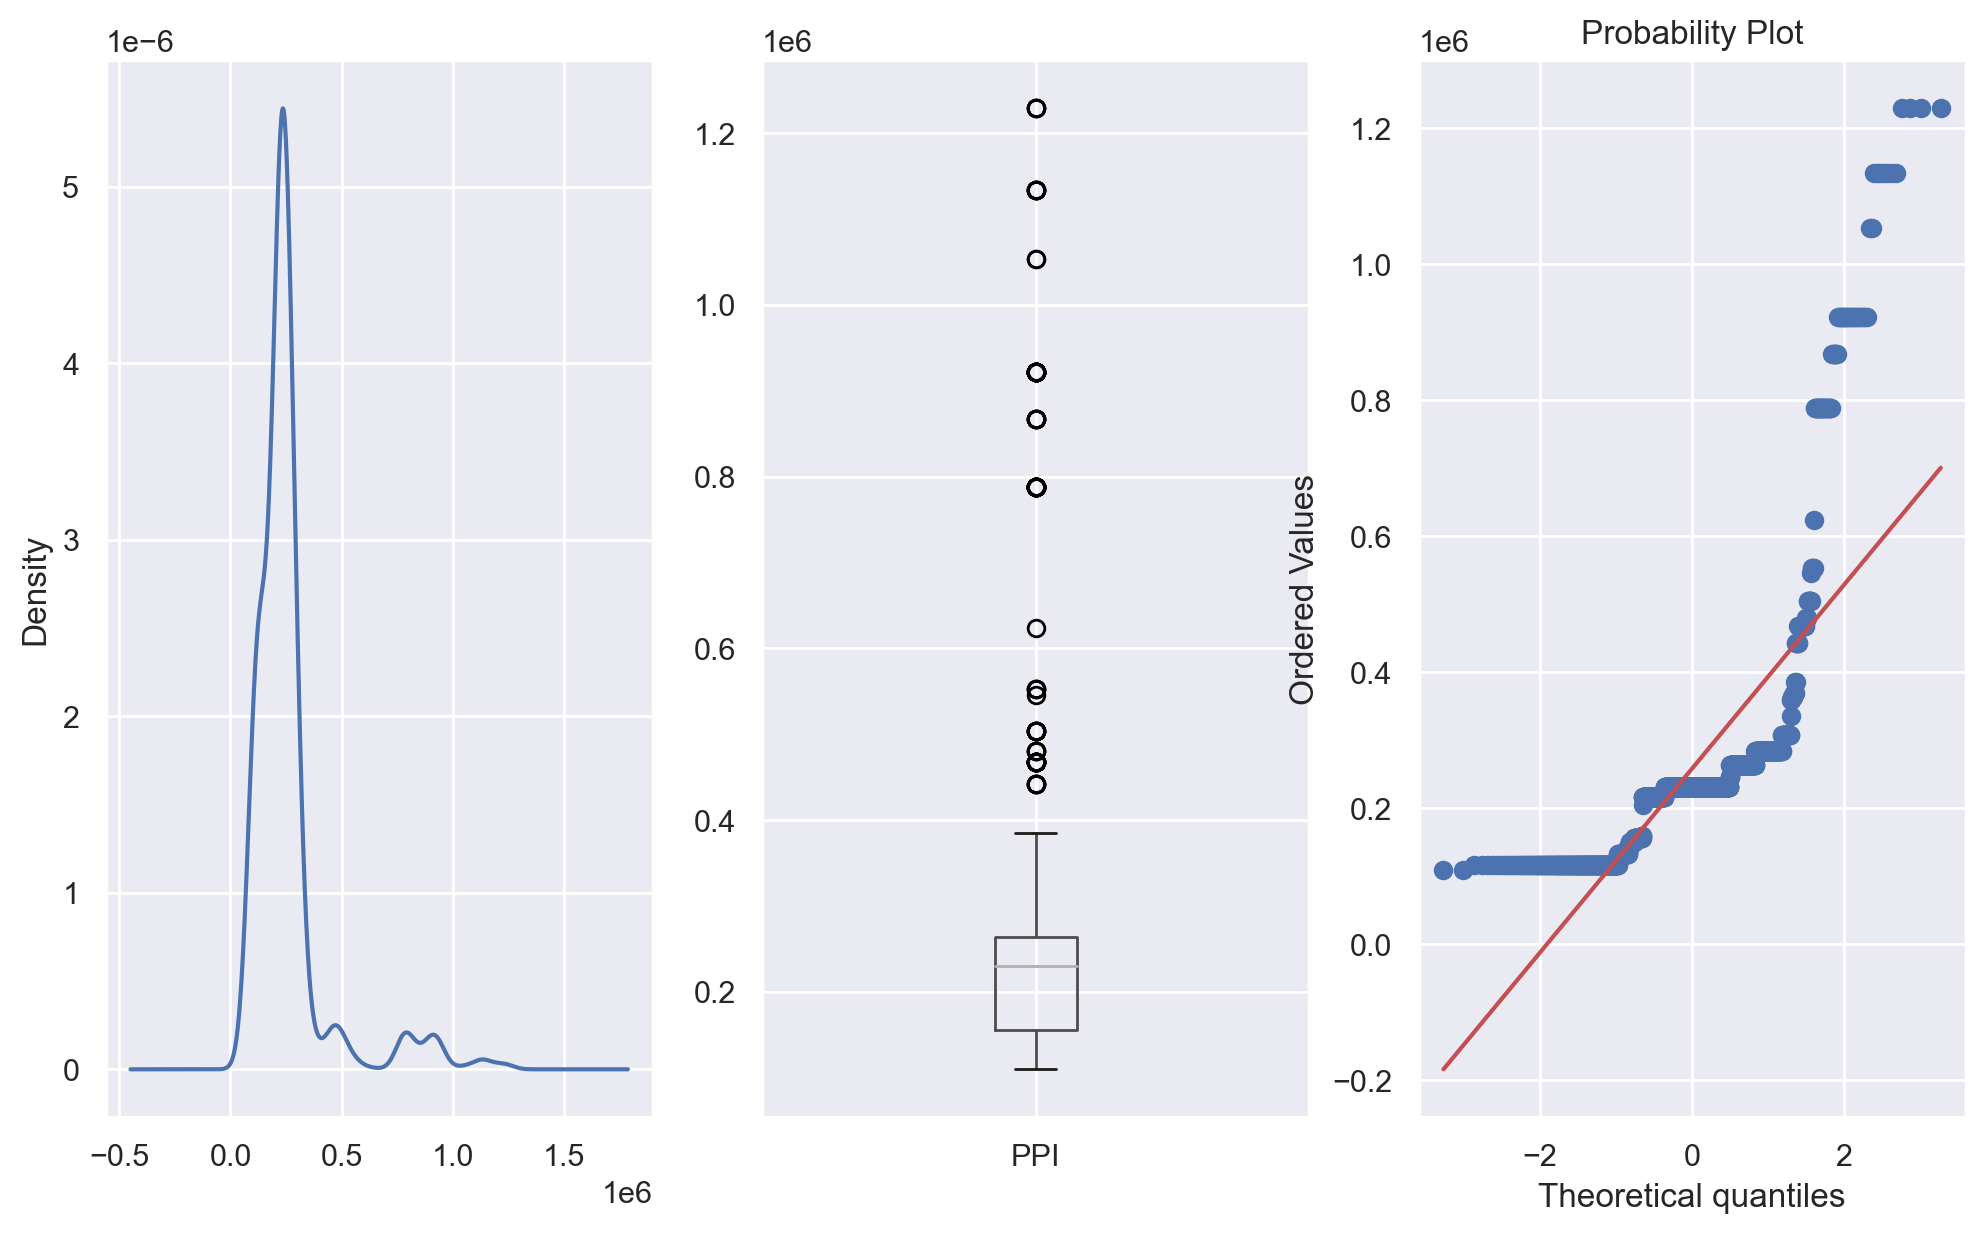

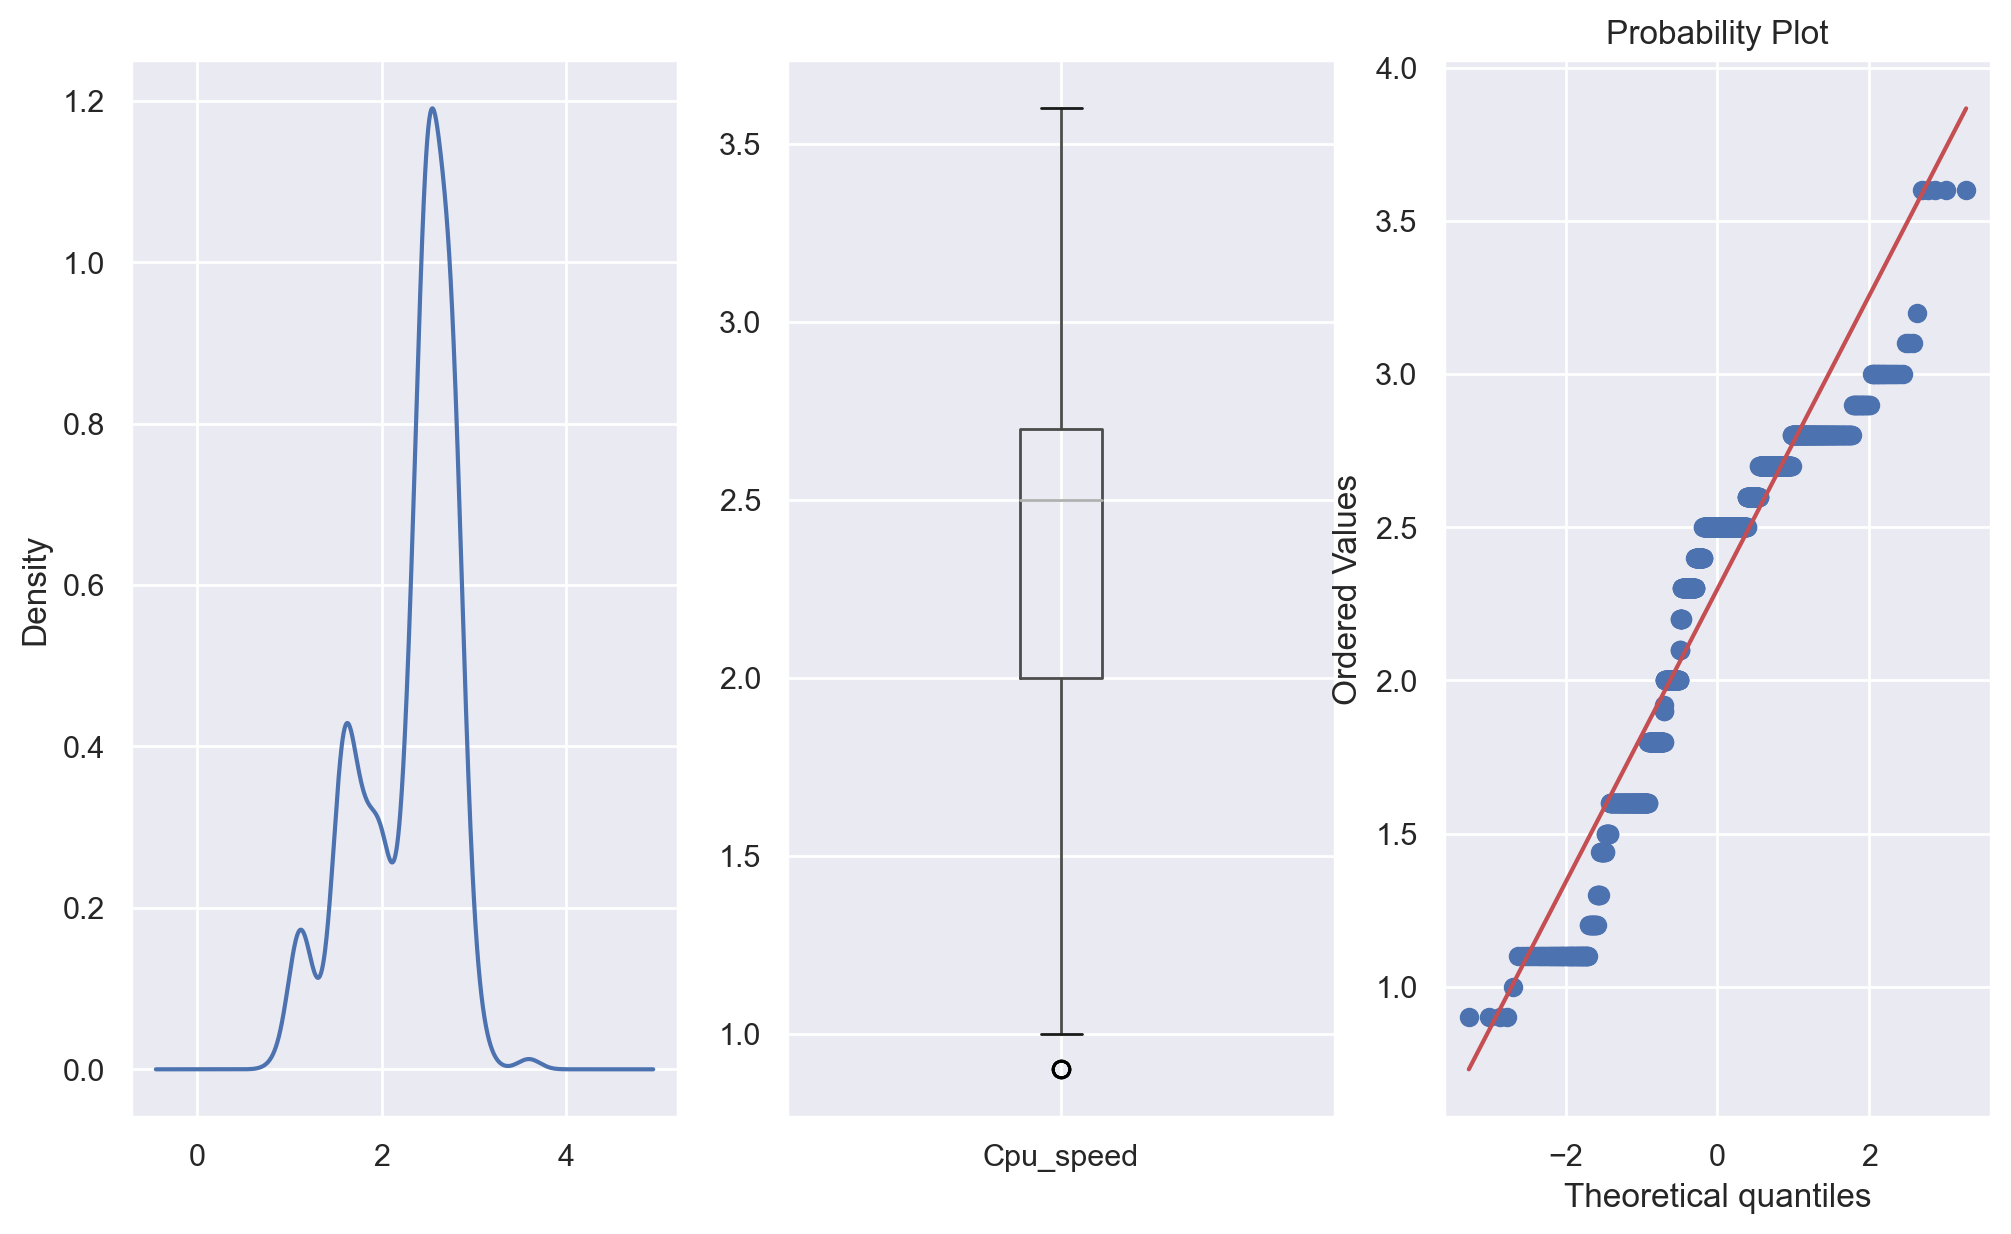

In [30]:
for feat in continuous:
    diagnostic_plots(df, feat)

### Observations

1. Continuous Features need Outliers Capping
2. Some of the features require transformation to abide by the linearity assumptions, I would apply variable transformation, particularly, BoxCox transformation.

In [31]:
to_transform = ['Weight', 'PPI', 'Inches', 'ScreenResolution', 'Memory', 'X_res', 'Y_res']

# Preprocessing and Modeling Pipeline

In [32]:
# Splitting the dataframe into a training and testing for testing the trained model
# When splitting, the target is Transformed by np.log 
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price_euros',
                                                            axis=1),
                                                    np.log(df['Price_euros']),
                                                    test_size=0.35,
                                                    random_state=42)

In [33]:
pipe = Pipeline(steps=[

    # Applying BoxCox transformation, to support normalization of continuious numerical features
    ('BoxCox', BoxCoxTransformer(variables=to_transform)),

    # Creating OneHotEncoding for the chosen features
    ('OnehotEncoder', OneHotEncoder(variables=one)),

    # Ordinal Encoder with respect to the target using Decision Tree model
    ('OrdinalEncoder',
     DecisionTreeEncoder(
         encoding_method='arbitrary', variables=ordinal, random_state=39)),

    # Capping outliers using Winsorizer, and adding them to the end tails of the distribution with a fold of 1.5
    ('OutlierCapping',
     Winsorizer(capping_method='gaussian',
                tail='both',
                fold=1.5,
                variables=continuous)),

    # Dropping Constant features which code be created when OneHotEncoding
    ('ConstantFeature', DropConstantFeatures()),

    # Standarizing the Features using StandardScaler from Sklearn.
    ('scaler', StandardScaler()),

    # Creating an instance of GradientBoostingRegressor
    ('GBR',
     GradientBoostingRegressor(
         learning_rate=0.1, n_estimators=600, random_state=39, max_depth=3))
])

In [34]:
# Training the created model using training sets
pipe.fit(X_train, y_train)

print('Train set')
# Creating prediction using the models based on Training data.
pred = pipe.predict(X_train)
# Calculating a fitting measure of the model, using r2
print('Gradient Boosting r2: {}'.format(r2_score(y_train, pred)))

print('Test set')
# Creating prediction using the models based on Testing data.
pred = pipe.predict(X_test)
# Calculating a fitting measure of the model, using r2
print('Gradient Boosting r2: {}'.format(r2_score(y_test, pred)))

Train set
Gradient Boosting r2: 0.9542123713026652
Test set
Gradient Boosting r2: 0.8921305027448636


# Comments

Text(0.5, 1.0, 'Feature Importance according to created model')

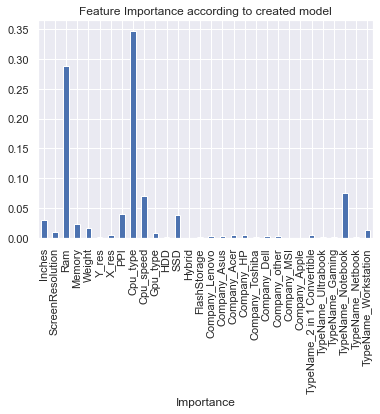

In [70]:
# Creating a series with the feature importances that fitted the model.
se = pd.Series(pipe.named_steps.GBR.feature_importances_,
               index=pipe.named_steps.ConstantFeature.variables)

# Plotting the feature importances according the model
se.plot.bar()

# Plot 
plt.xlabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importance according to created model')

Text(0.5, 1.0, 'Most important Features and their Importances according to created model')

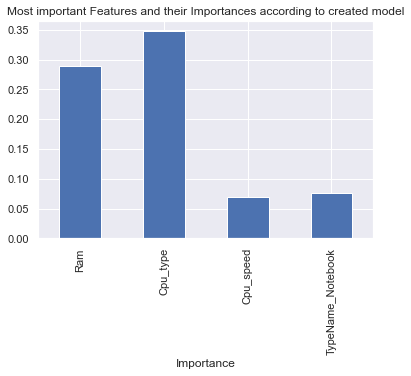

In [71]:
# Specifying Most importance features according to the created model, by Series filtering.
se[se > 0.05].plot.bar()

# Plot 
plt.xlabel('Feature')
plt.xlabel('Importance')
plt.title('Most important Features and their Importances according to created model')